In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df_tx = gpd.read_file('../cleaned_datasets/all_plus_facilities/all_plus_facilities.shp')

In [3]:
df_tx.columns

Index(['tract_num', 'company', 'corp', 'num_refine', 'county', 'respir_hi',
       'neurol_hi', 'develop_hi', 'reprodu_hi', 'kidney_hi', 'immuno_hi',
       'tot_bod_hi', 'total_r/m', 'ptstat_r/m', 'benzen_r/m', 'coke_r/m',
       'butadi_r/m', 'benzene_t', 'toluene_t', 'eth_benz_t', 'xylenes_t',
       'diesel_t', 'trimeth_t', 'coke_t', 'butadien_t', 'county_num',
       'cancer_%', 'cancer_%_l', 'cancer_%_h', 'total_pop', 'geo_loc', 'mtfcc',
       'aland', 'awater', 'intptlat', 'intptlon', 'households', 'below_pove',
       'hh_snap', 'hh_nowork', 'tract_name', 'below50pov', 'below125po',
       'below150po', 'below185po', 'below200po', 'below300po', 'below400po',
       'below500po', 'facility_n', 'industry_s', 'number_fac', 'geometry'],
      dtype='object')

In [14]:
weightavept = (df_tx['ptstat_r/m']*df_tx['total_pop']).sum()/(df_tx['total_pop'].sum())

In [23]:
df_tx['ptstat_r/m'].mean(), weightavept #not that different

(4.076782082103722, 4.20685538239647)

In [24]:
df_tx['ptstat_r/m']/weightavept

0       0.090393
1       0.031572
2       0.098055
3       0.034675
4       0.035697
          ...   
5233    0.011362
5234    0.008545
5235    0.001694
5236    0.005665
5237    0.005983
Name: ptstat_r/m, Length: 5238, dtype: float64

In [34]:
df_tx['weighted_multiple'] = df_tx['ptstat_r/m']/weightavept

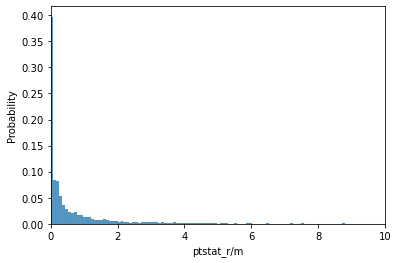

In [33]:
sns.histplot(df_tx['ptstat_r/m']/weightavept,stat='probability')
plt.xlim([0,10]);

In [37]:
df_tx.to_file('../cleaned_datasets/all_plus_facilities/all_plus_facilities.shp',index=False)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_252\2535974196.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_tx.to_file('../cleaned_datasets/all_plus_facilities/all_plus_facilities.shp',index=False)


In [39]:
df_tx['weighted_multiple'].mean() #about what you would expect if this is norming on on the average exposure-> the reason it's not 
#*perfectly* 1 is because it's weighted, and undoing that would require slightly different calculations. But this is just a sanity check

0.9690806342340557